In [21]:
import pickle
import pandas as pd
import numpy as np
from scipy import stats
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier



In [22]:
data = np.loadtxt("/Users/levguzman/Documents/IDM_Life/4to/Modelación del aprendizaje con inteligencia artificial/Proyecto1/activity_data.txt")

In [23]:
data = pd.DataFrame(data)

# Dataset

In [24]:
clase_dict = {
    1: 'Nothing',
    2: 'Despegue',
    3: 'Aterrizaje',
    4: 'Vuelo_estable',
    5: 'Turbulencia',
    6: 'Choque',
    7: 'Truco',
    8: 'Patrones_de_espera',
    9: 'En_pista'
}

In [25]:
if data[0].isnull().any():
    print("Hay valores NaN en la primera columna.")

data[0] = data[0].astype(int).map(clase_dict)

senales = ["accX", "accY", "accZ",
           "lin_accX", "lin_accY", "lin_accZ",
           "gyroX", "gyroY", "gyroZ",
           "magX", "magY", "magZ",
           "gpsLat", "gpsLon"]

In [26]:
columnas = ["Clase"]
for i in senales:
    columnas.append(f"{i}_average")
    columnas.append(f"{i}_std")
    columnas.append(f"{i}_max")
    columnas.append(f"{i}_min")
    columnas.append(f"{i}_kurtosis")
    columnas.append(f"{i}_skew")
columnas.append("rms")

data.columns = columnas

In [27]:
data

,Clase,accX_average,accX_std,accX_max,accX_min,accX_kurtosis,accX_skew,accY_average,accY_std,accY_max,...,gpsLat_min,gpsLat_kurtosis,gpsLat_skew,gpsLon_average,gpsLon_std,gpsLon_max,gpsLon_min,gpsLon_kurtosis,gpsLon_skew,rms
0,En_pista,-0.025116,0.087655,0.116907,-0.158404,-1.399796,0.085810,0.180242,0.197988,0.463070,...,20.754463,1.964161,-1.831683,-103.436973,5.343105e-07,-103.436973,-103.436975,1.959270,-1.830415,1921.830757
1,En_pista,-0.119639,0.089646,0.009580,-0.230024,-1.681475,0.056328,0.443187,0.048490,0.493560,...,20.754447,0.168996,1.158348,-103.436985,3.589446e-06,-103.436976,-103.436988,0.478486,1.286342,3304.303190
2,En_pista,-0.250715,0.059499,-0.176855,-0.359621,-1.362193,-0.359815,0.196507,0.144990,0.495919,...,20.754446,-1.260097,-0.334949,-103.436953,1.388064e-05,-103.436939,-103.436984,-0.704305,-0.773442,5284.899756
3,En_pista,-0.510509,0.183126,-0.201631,-0.804669,-1.267987,0.057132,0.099472,0.024805,0.134941,...,20.754453,-0.415048,-0.926352,-103.436938,2.124627e-06,-103.436935,-103.436943,-0.782685,-0.412584,7862.046367
4,En_pista,-0.198285,0.450674,0.995361,-0.816253,0.441761,1.013627,0.404866,0.361154,1.340870,...,20.754448,-0.402641,0.483118,-103.436932,5.248461e-06,-103.436922,-103.436943,-0.380154,-0.354838,7393.071677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Nothing,0.107345,0.001711,0.108824,0.103199,-0.250399,-1.008407,0.101905,0.007004,0.111521,...,20.754451,1.283699,1.337758,-103.437026,7.850128e-07,-103.437023,-103.437027,1.283699,1.337758,11547.560578
536,Nothing,0.006807,0.075042,0.129514,-0.121794,-1.196635,-0.076250,0.074302,0.015694,0.115410,...,20.754452,1.120528,-1.597362,-103.437021,2.085850e-07,-103.437021,-103.437022,1.120529,-1.597362,11546.809998
537,Nothing,0.120819,0.007984,0.130678,0.104653,-1.089478,-0.583776,0.101603,0.007974,0.111839,...,20.754452,-0.168752,-0.779664,-103.437021,1.102204e-07,-103.437021,-103.437021,-0.168752,-0.779665,11543.485502
538,Nothing,0.115669,0.011062,0.129331,0.097418,-1.506728,-0.139908,0.106158,0.002527,0.111967,...,20.754452,-0.945100,-0.663075,-103.437021,8.483159e-08,-103.437021,-103.437021,-0.945099,-0.663076,11543.014779


In [28]:
print("Cantidad de datos predictores:", data.shape[0]*(data.shape[1] - 1))
print(f"Valores nulos: {data.isna().sum().sum()}")

Cantidad de datos predictores: 45900
Valores nulos: 0


In [29]:
def ver_categorias(data):
    for i in data.columns:
        if data[i].dtype not in ["float64"]:
            print()
            print("------------------")
            print(f"{i}: {len(set(data[i]))}")
            print(set(data[i]))

ver_categorias(data)


------------------
Clase: 9
{'En_pista', 'Vuelo_estable', 'Despegue', 'Turbulencia', 'Truco', 'Nothing', 'Choque', 'Patrones_de_espera', 'Aterrizaje'}


# LDA

In [30]:
columnas.remove("Clase")
x = data[columnas]
y = data["Clase"]

In [ ]:
def evaluate_lda_stratified_shuffle_split(X, y, train_size=0.8, n_splits=5, random_state=1234, getter=False):
    sss = StratifiedShuffleSplit(
        n_splits=n_splits,
        train_size=train_size,
        random_state=random_state
    )
    
    classes = np.unique(y)
    num_classes = len(classes)
    
    acc = 0
    recall = np.zeros(num_classes)
    precision = np.zeros(num_classes)
    
    cv_y_test = []
    cv_y_pred = []
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf = LinearDiscriminantAnalysis()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
        
        acc += accuracy_score(y_test, y_pred)
        recall += recall_score(y_test, y_pred, average=None, labels=classes)
        precision += precision_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
    
    #promediossss
    acc_mean = acc / n_splits
    precision_mean = precision / n_splits
    recall_mean = recall / n_splits
    
    y_test_all = np.concatenate(cv_y_test)
    y_pred_all = np.concatenate(cv_y_pred)
    cm = confusion_matrix(y_test_all, y_pred_all, labels=classes)
    report = classification_report(y_test_all, y_pred_all, target_names=classes, zero_division=0)
    
    results = {
        'accuracy': acc_mean,
        'precision': dict(zip(classes, precision_mean)),
        'recall': dict(zip(classes, recall_mean)),
        'confusion_matrix': cm,
        'classification_report': report,
        'y_test_all': y_test_all,
        'y_pred_all': y_pred_all,
        'classes': classes
    }
    
    if getter:
        observacion = [train_size, acc_mean]
        for cls in sorted(classes):
            observacion.append(recall_mean[np.where(classes == cls)[0][0]])
        return observacion
    else:
        return results

## Una iteración 

In [32]:
results = evaluate_lda_stratified_shuffle_split(x, y, n_splits=5)

print("------------------")
print(f'Accuracy promedio: {results["accuracy"]:.4f}')
print("------------------")
print('Precision por clase:')
for cls, prec in results["precision"].items():
    print(f'{cls}: {prec:.4f}')
print("------------------")
print('Recall por clase:')
for cls, rec in results["recall"].items():
    print(f'{cls}: {rec:.4f}')
print("------------------")
print(f'Matriz de confusión:\n{results["confusion_matrix"]}')
print("Clases:", results["classes"])
print("------------------")
print(f'Reporte de clasificación:\n{results["classification_report"]}')
print("------------------")

------------------
Accuracy promedio: 0.8704
------------------
Precision por clase:
Aterrizaje: 0.9498
Choque: 1.0000
Despegue: 1.0000
En_pista: 0.8911
Nothing: 0.8569
Patrones_de_espera: 0.9203
Truco: 0.9262
Turbulencia: 0.9618
Vuelo_estable: 0.5825
------------------
Recall por clase:
Aterrizaje: 0.9000
Choque: 0.9667
Despegue: 0.9667
En_pista: 0.6167
Nothing: 0.7000
Patrones_de_espera: 0.9333
Truco: 0.9833
Turbulencia: 0.8167
Vuelo_estable: 0.9500
------------------
Matriz de confusión:
[[54  0  0  0  0  1  2  0  3]
 [ 1 58  0  0  0  0  1  0  0]
 [ 0  0 58  0  0  0  0  1  1]
 [ 1  0  0 37  7  0  2  0 13]
 [ 0  0  0  5 42  0  0  0 13]
 [ 0  0  0  0  0 56  0  1  3]
 [ 1  0  0  0  0  0 59  0  0]
 [ 0  0  0  0  0  1  0 49 10]
 [ 0  0  0  0  0  3  0  0 57]]
Clases: ['Aterrizaje' 'Choque' 'Despegue' 'En_pista' 'Nothing'
 'Patrones_de_espera' 'Truco' 'Turbulencia' 'Vuelo_estable']
------------------
Reporte de clasificación:
                    precision    recall  f1-score   support

   

## Evaluar con distintos train_sizes

In [33]:
datos = []

for i in range(int(19)):
    for j in range(int(20)):
        r = evaluate_lda_stratified_shuffle_split(x, y, train_size=((((i + 1)*5)/100)),
                                                  n_splits=5, random_state=1234 + j,
                                                  getter=True)
        datos.append(r)

import matplotlib.pyplot as plt

column_names = ['Tamaño_Entrenamiento', 'Exactitud']
classes = sorted(clase_dict.values())
column_names.extend([f'Recall_{cls}' for cls in classes])

dato = pd.DataFrame(datos, columns=column_names)

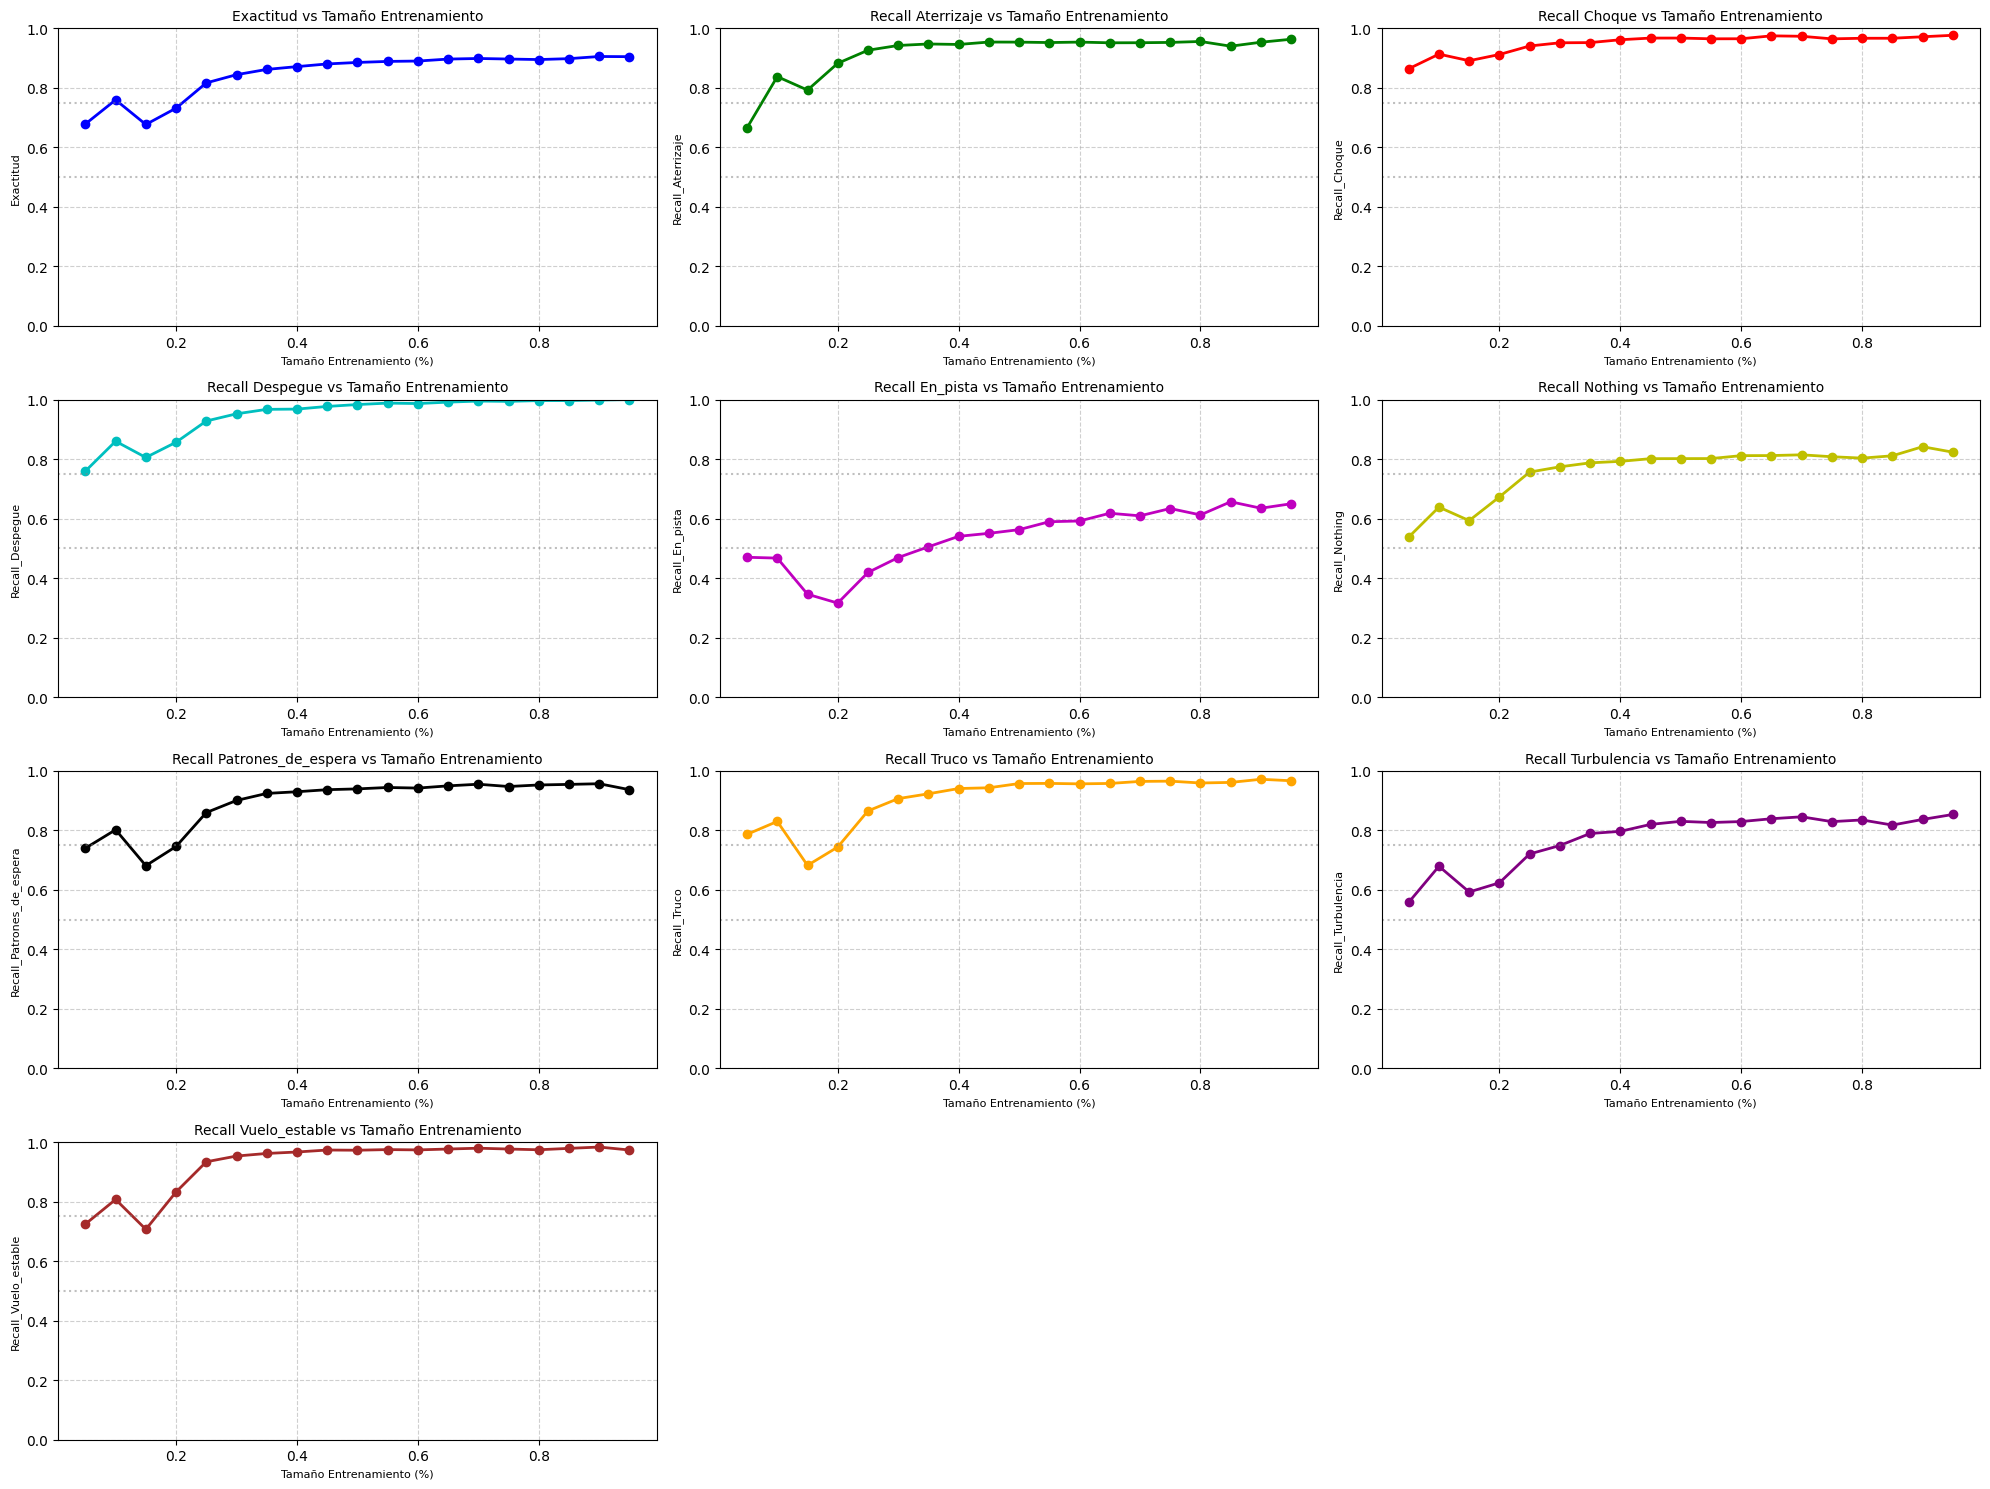

In [34]:
df_promedio = dato.groupby('Tamaño_Entrenamiento').mean().reset_index()

plt.figure(figsize=(20, 15))

# Lista de métricas y colores
metricas = [('Exactitud', 'b')]
colors = ['g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for cls, color in zip(classes, colors):
    metricas.append((f'Recall_{cls}', color))

# Crear subplots en grid 4x3
for idx, (metrica, color) in enumerate(metricas, start=1):
    plt.subplot(4, 3, idx)
    plt.plot(df_promedio['Tamaño_Entrenamiento'], df_promedio[metrica], 
             marker='o', color=color, linestyle='-', linewidth=2)
    
    # Extraer el nombre de la clase del nombre de la métrica
    if metrica.startswith('Recall_'):
        title = f'Recall {metrica[7:]} vs Tamaño Entrenamiento'
    else:
        title = f'{metrica} vs Tamaño Entrenamiento'
    
    plt.title(title, fontsize=10)
    plt.xlabel('Tamaño Entrenamiento (%)', fontsize=8)
    plt.ylabel(metrica, fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(0, 1)
    plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
    plt.axhline(y=0.75, color='gray', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

---

# K-NN

In [35]:
def evaluate_knn_stratified_shuffle_split(X, y, train_size=0.8, n_splits=5, random_state=1234, getter=False):
    sss = StratifiedShuffleSplit(
        n_splits=n_splits,
        train_size=train_size,
        random_state=random_state
    )
    
    classes = np.unique(y)
    num_classes = len(classes)
    
    acc = 0
    recall = np.zeros(num_classes)
    precision = np.zeros(num_classes)
    
    cv_y_test = []
    cv_y_pred = []
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf = KNeighborsClassifier(n_neighbors=3)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
        
        acc += accuracy_score(y_test, y_pred)
        recall += recall_score(y_test, y_pred, average=None, labels=classes)
        precision += precision_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
    
    acc_mean = acc / n_splits
    precision_mean = precision / n_splits
    recall_mean = recall / n_splits
    
    y_test_all = np.concatenate(cv_y_test)
    y_pred_all = np.concatenate(cv_y_pred)
    cm = confusion_matrix(y_test_all, y_pred_all, labels=classes)
    report = classification_report(y_test_all, y_pred_all, target_names=classes, zero_division=0)
    
    results = {
        'accuracy': acc_mean,
        'precision': dict(zip(classes, precision_mean)),
        'recall': dict(zip(classes, recall_mean)),
        'confusion_matrix': cm,
        'classification_report': report,
        'y_test_all': y_test_all,
        'y_pred_all': y_pred_all,
        'classes': classes
    }
    
    if getter:
        observacion = [train_size, acc_mean]
        for cls in sorted(classes):
            observacion.append(recall_mean[np.where(classes == cls)[0][0]])
        return observacion
    else:
        return results

In [36]:
results = evaluate_knn_stratified_shuffle_split(x, y, n_splits=5)

print("------------------")
print(f'Accuracy promedio: {results["accuracy"]:.4f}')
print("------------------")
print('Precision por clase:')
for cls, prec in results["precision"].items():
    print(f'{cls}: {prec:.4f}')
print("------------------")
print('Recall por clase:')
for cls, rec in results["recall"].items():
    print(f'{cls}: {rec:.4f}')
print("------------------")
print(f'Matriz de confusión:\n{results["confusion_matrix"]}')
print("Clases:", results["classes"])
print("------------------")
print(f'Reporte de clasificación:\n{results["classification_report"]}')
print("------------------")

------------------
Accuracy promedio: 0.9167
------------------
Precision por clase:
Aterrizaje: 0.9385
Choque: 1.0000
Despegue: 0.9846
En_pista: 0.8748
Nothing: 0.8366
Patrones_de_espera: 0.9714
Truco: 0.8538
Turbulencia: 0.9179
Vuelo_estable: 0.9179
------------------
Recall por clase:
Aterrizaje: 0.9167
Choque: 0.9167
Despegue: 0.9500
En_pista: 0.8167
Nothing: 0.8833
Patrones_de_espera: 1.0000
Truco: 0.9667
Turbulencia: 0.8833
Vuelo_estable: 0.9167
------------------
Matriz de confusión:
[[55  0  0  0  0  0  5  0  0]
 [ 3 55  0  0  0  0  2  0  0]
 [ 0  0 57  0  0  0  3  0  0]
 [ 0  0  0 49 11  0  0  0  0]
 [ 0  0  0  7 53  0  0  0  0]
 [ 0  0  0  0  0 60  0  0  0]
 [ 1  0  1  0  0  0 58  0  0]
 [ 0  0  0  0  0  2  0 53  5]
 [ 0  0  0  0  0  0  0  5 55]]
Clases: ['Aterrizaje' 'Choque' 'Despegue' 'En_pista' 'Nothing'
 'Patrones_de_espera' 'Truco' 'Turbulencia' 'Vuelo_estable']
------------------
Reporte de clasificación:
                    precision    recall  f1-score   support

   

## Distintos Test-Size

In [37]:
datos = []

for i in range(int(19)):
    for j in range(int(20)):
        r = evaluate_knn_stratified_shuffle_split(x, y, train_size=((((i + 1)*5)/100)),
                                                  n_splits=5, random_state=1234 + j,
                                                  getter=True)
        datos.append(r)

import matplotlib.pyplot as plt

column_names = ['Tamaño_Entrenamiento', 'Exactitud']
classes = sorted(clase_dict.values())
column_names.extend([f'Recall_{cls}' for cls in classes])

dato = pd.DataFrame(datos, columns=column_names)

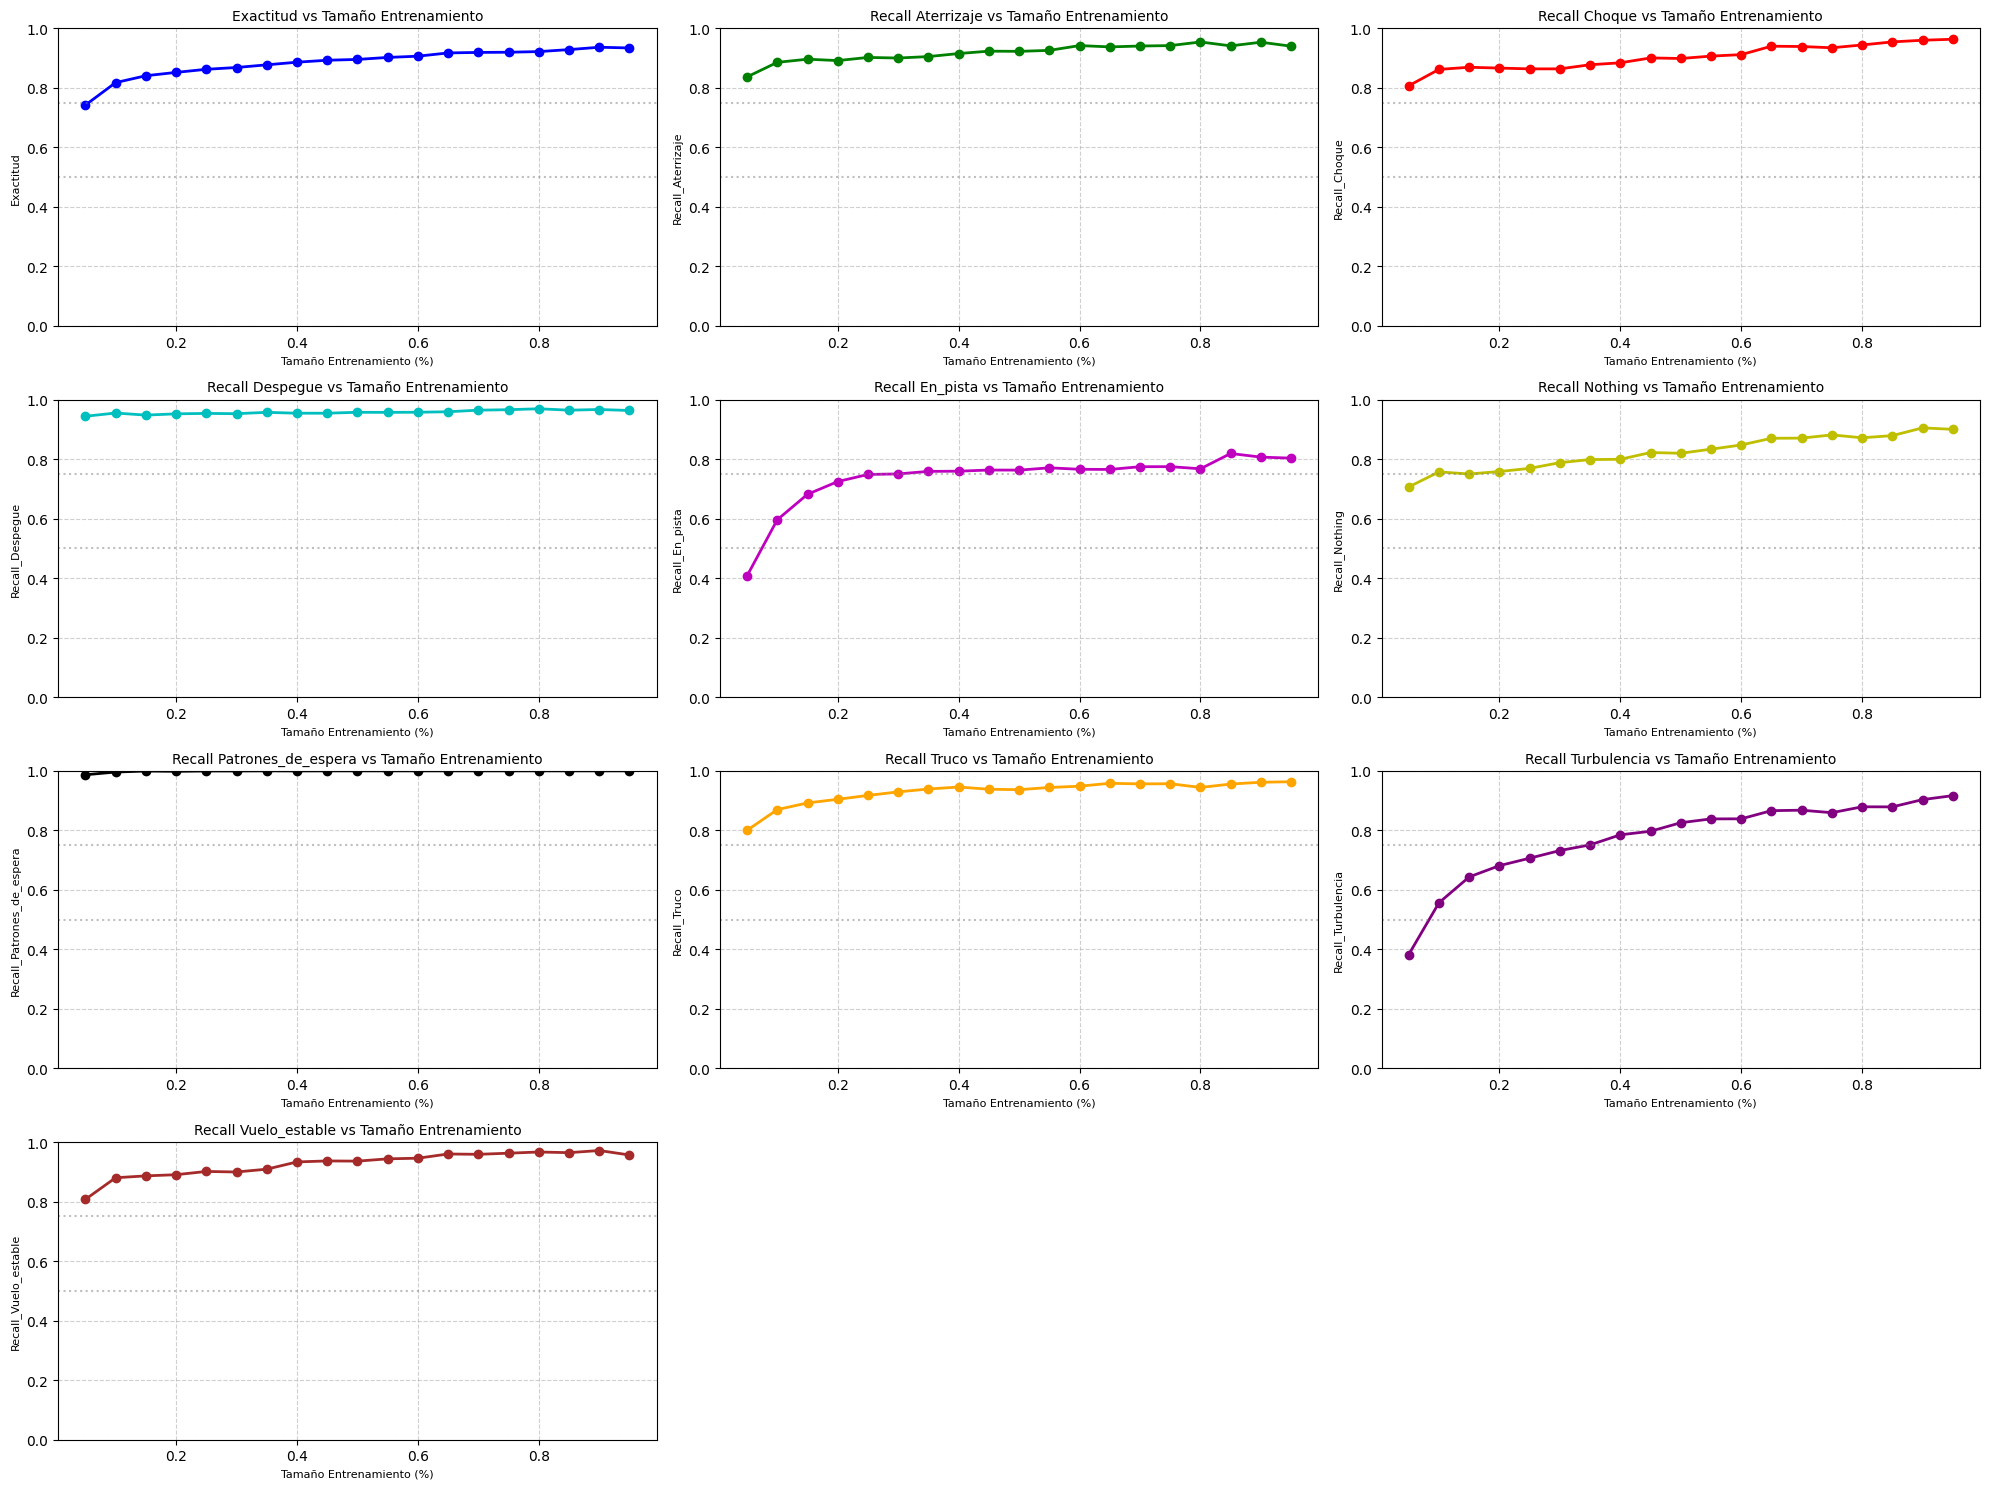

In [38]:
df_promedio = dato.groupby('Tamaño_Entrenamiento').mean().reset_index()

plt.figure(figsize=(20, 15))

# Lista de métricas y colores
metricas = [('Exactitud', 'b')]
colors = ['g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for cls, color in zip(classes, colors):
    metricas.append((f'Recall_{cls}', color))

# Crear subplots en grid 4x3
for idx, (metrica, color) in enumerate(metricas, start=1):
    plt.subplot(4, 3, idx)
    plt.plot(df_promedio['Tamaño_Entrenamiento'], df_promedio[metrica], 
             marker='o', color=color, linestyle='-', linewidth=2)
    
    # Extraer el nombre de la clase del nombre de la métrica
    if metrica.startswith('Recall_'):
        title = f'Recall {metrica[7:]} vs Tamaño Entrenamiento'
    else:
        title = f'{metrica} vs Tamaño Entrenamiento'
    
    plt.title(title, fontsize=10)
    plt.xlabel('Tamaño Entrenamiento (%)', fontsize=8)
    plt.ylabel(metrica, fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(0, 1)
    plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
    plt.axhline(y=0.75, color='gray', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

---

# MLP

In [39]:
"""
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_i = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10,10), max_iter=10000)
    clf_i.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf_i.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
"""

'\ncv_y_test = []\ncv_y_pred = []\n\nfor train_index, test_index in kf.split(x, y):\n\n    # Training phase\n    x_train = x[train_index, :]\n    y_train = y[train_index]\n\n    clf_i = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10,10), max_iter=10000)\n    clf_i.fit(x_train, y_train)\n\n    # Test phase\n    x_test = x[test_index, :]\n    y_test = y[test_index]    \n    y_pred = clf_i.predict(x_test)\n\n    cv_y_test.append(y_test)\n    cv_y_pred.append(y_pred)\n\nprint(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))\n'

REVISAR ESTE CÓDIGO

In [40]:
def evaluate_MLP_stratified_shuffle_split(X, y, train_size=0.8, n_splits=5, random_state=1234, getter=False):
    sss = StratifiedShuffleSplit(
        n_splits=n_splits,
        train_size=train_size,
        random_state=random_state
    )
    
    classes = np.unique(y)
    num_classes = len(classes)
    
    acc = 0
    recall = np.zeros(num_classes)
    precision = np.zeros(num_classes)
    
    cv_y_test = []
    cv_y_pred = []
    
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10,10), max_iter=10000)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
        
        acc += accuracy_score(y_test, y_pred)
        recall += recall_score(y_test, y_pred, average=None, labels=classes)
        precision += precision_score(y_test, y_pred, average=None, labels=classes, zero_division=0)
    
    acc_mean = acc / n_splits
    precision_mean = precision / n_splits
    recall_mean = recall / n_splits
    
    y_test_all = np.concatenate(cv_y_test)
    y_pred_all = np.concatenate(cv_y_pred)
    cm = confusion_matrix(y_test_all, y_pred_all, labels=classes)
    report = classification_report(y_test_all, y_pred_all, target_names=classes, zero_division=0)
    
    results = {
        'accuracy': acc_mean,
        'precision': dict(zip(classes, precision_mean)),
        'recall': dict(zip(classes, recall_mean)),
        'confusion_matrix': cm,
        'classification_report': report,
        'y_test_all': y_test_all,
        'y_pred_all': y_pred_all,
        'classes': classes
    }
    
    if getter:
        observacion = [train_size, acc_mean]
        for cls in sorted(classes):
            observacion.append(recall_mean[np.where(classes == cls)[0][0]])
        return observacion
    else:
        return results

In [41]:
results = evaluate_MLP_stratified_shuffle_split(x, y, n_splits=5)

print("------------------")
print(f'Accuracy promedio: {results["accuracy"]:.4f}')
print("------------------")
print('Precision por clase:')
for cls, prec in results["precision"].items():
    print(f'{cls}: {prec:.4f}')
print("------------------")
print('Recall por clase:')
for cls, rec in results["recall"].items():
    print(f'{cls}: {rec:.4f}')
print("------------------")
print(f'Matriz de confusión:\n{results["confusion_matrix"]}')
print("Clases:", results["classes"])
print("------------------")
print(f'Reporte de clasificación:\n{results["classification_report"]}')
print("------------------")

------------------
Accuracy promedio: 0.8000
------------------
Precision por clase:
Aterrizaje: 0.8046
Choque: 0.8561
Despegue: 0.8082
En_pista: 0.7139
Nothing: 0.7838
Patrones_de_espera: 0.8764
Truco: 0.8952
Turbulencia: 0.7693
Vuelo_estable: 0.7870
------------------
Recall por clase:
Aterrizaje: 0.8833
Choque: 0.8167
Despegue: 0.8667
En_pista: 0.6667
Nothing: 0.7500
Patrones_de_espera: 0.9333
Truco: 0.7833
Turbulencia: 0.6333
Vuelo_estable: 0.8667
------------------
Matriz de confusión:
[[53  5  0  0  0  0  0  2  0]
 [ 3 49  0  1  0  0  5  0  2]
 [ 0  0 52  0  0  1  0  5  2]
 [ 1  3  2 40 12  2  0  0  0]
 [ 0  0  0 15 45  0  0  0  0]
 [ 0  0  1  0  0 56  0  1  2]
 [ 6  3  0  0  0  1 47  0  3]
 [ 1  0 10  0  0  3  2 38  6]
 [ 3  0  1  0  0  2  0  2 52]]
Clases: ['Aterrizaje' 'Choque' 'Despegue' 'En_pista' 'Nothing'
 'Patrones_de_espera' 'Truco' 'Turbulencia' 'Vuelo_estable']
------------------
Reporte de clasificación:
                    precision    recall  f1-score   support

   

In [43]:
datos = []

for i in range(int(19)):
    for j in range(int(20)):
        r = evaluate_MLP_stratified_shuffle_split(x, y, train_size=((((i + 1)*5)/100)),
                                                  n_splits=5, random_state=1234 + j,
                                                  getter=True)
        datos.append(r)
        print(f"i: {i}, j: {j}")

import matplotlib.pyplot as plt

column_names = ['Tamaño_Entrenamiento', 'Exactitud']
classes = sorted(clase_dict.values())
column_names.extend([f'Recall_{cls}' for cls in classes])

dato = pd.DataFrame(datos, columns=column_names)

i: 0, j: 0
i: 0, j: 1
i: 0, j: 2
i: 0, j: 3
i: 0, j: 4
i: 0, j: 5
i: 0, j: 6
i: 0, j: 7
i: 0, j: 8
i: 0, j: 9
i: 0, j: 10
i: 0, j: 11
i: 0, j: 12
i: 0, j: 13
i: 0, j: 14
i: 0, j: 15
i: 0, j: 16
i: 0, j: 17
i: 0, j: 18
i: 0, j: 19
i: 1, j: 0
i: 1, j: 1
i: 1, j: 2
i: 1, j: 3
i: 1, j: 4
i: 1, j: 5
i: 1, j: 6
i: 1, j: 7
i: 1, j: 8
i: 1, j: 9
i: 1, j: 10
i: 1, j: 11
i: 1, j: 12
i: 1, j: 13
i: 1, j: 14
i: 1, j: 15
i: 1, j: 16
i: 1, j: 17
i: 1, j: 18
i: 1, j: 19
i: 2, j: 0
i: 2, j: 1
i: 2, j: 2
i: 2, j: 3
i: 2, j: 4
i: 2, j: 5
i: 2, j: 6
i: 2, j: 7
i: 2, j: 8
i: 2, j: 9
i: 2, j: 10
i: 2, j: 11
i: 2, j: 12
i: 2, j: 13
i: 2, j: 14
i: 2, j: 15
i: 2, j: 16
i: 2, j: 17
i: 2, j: 18
i: 2, j: 19
i: 3, j: 0
i: 3, j: 1
i: 3, j: 2
i: 3, j: 3
i: 3, j: 4
i: 3, j: 5
i: 3, j: 6
i: 3, j: 7
i: 3, j: 8
i: 3, j: 9
i: 3, j: 10
i: 3, j: 11
i: 3, j: 12
i: 3, j: 13
i: 3, j: 14
i: 3, j: 15
i: 3, j: 16
i: 3, j: 17
i: 3, j: 18
i: 3, j: 19
i: 4, j: 0
i: 4, j: 1
i: 4, j: 2
i: 4, j: 3
i: 4, j: 4
i: 4, j: 5
i: 4, j: 6
i: 

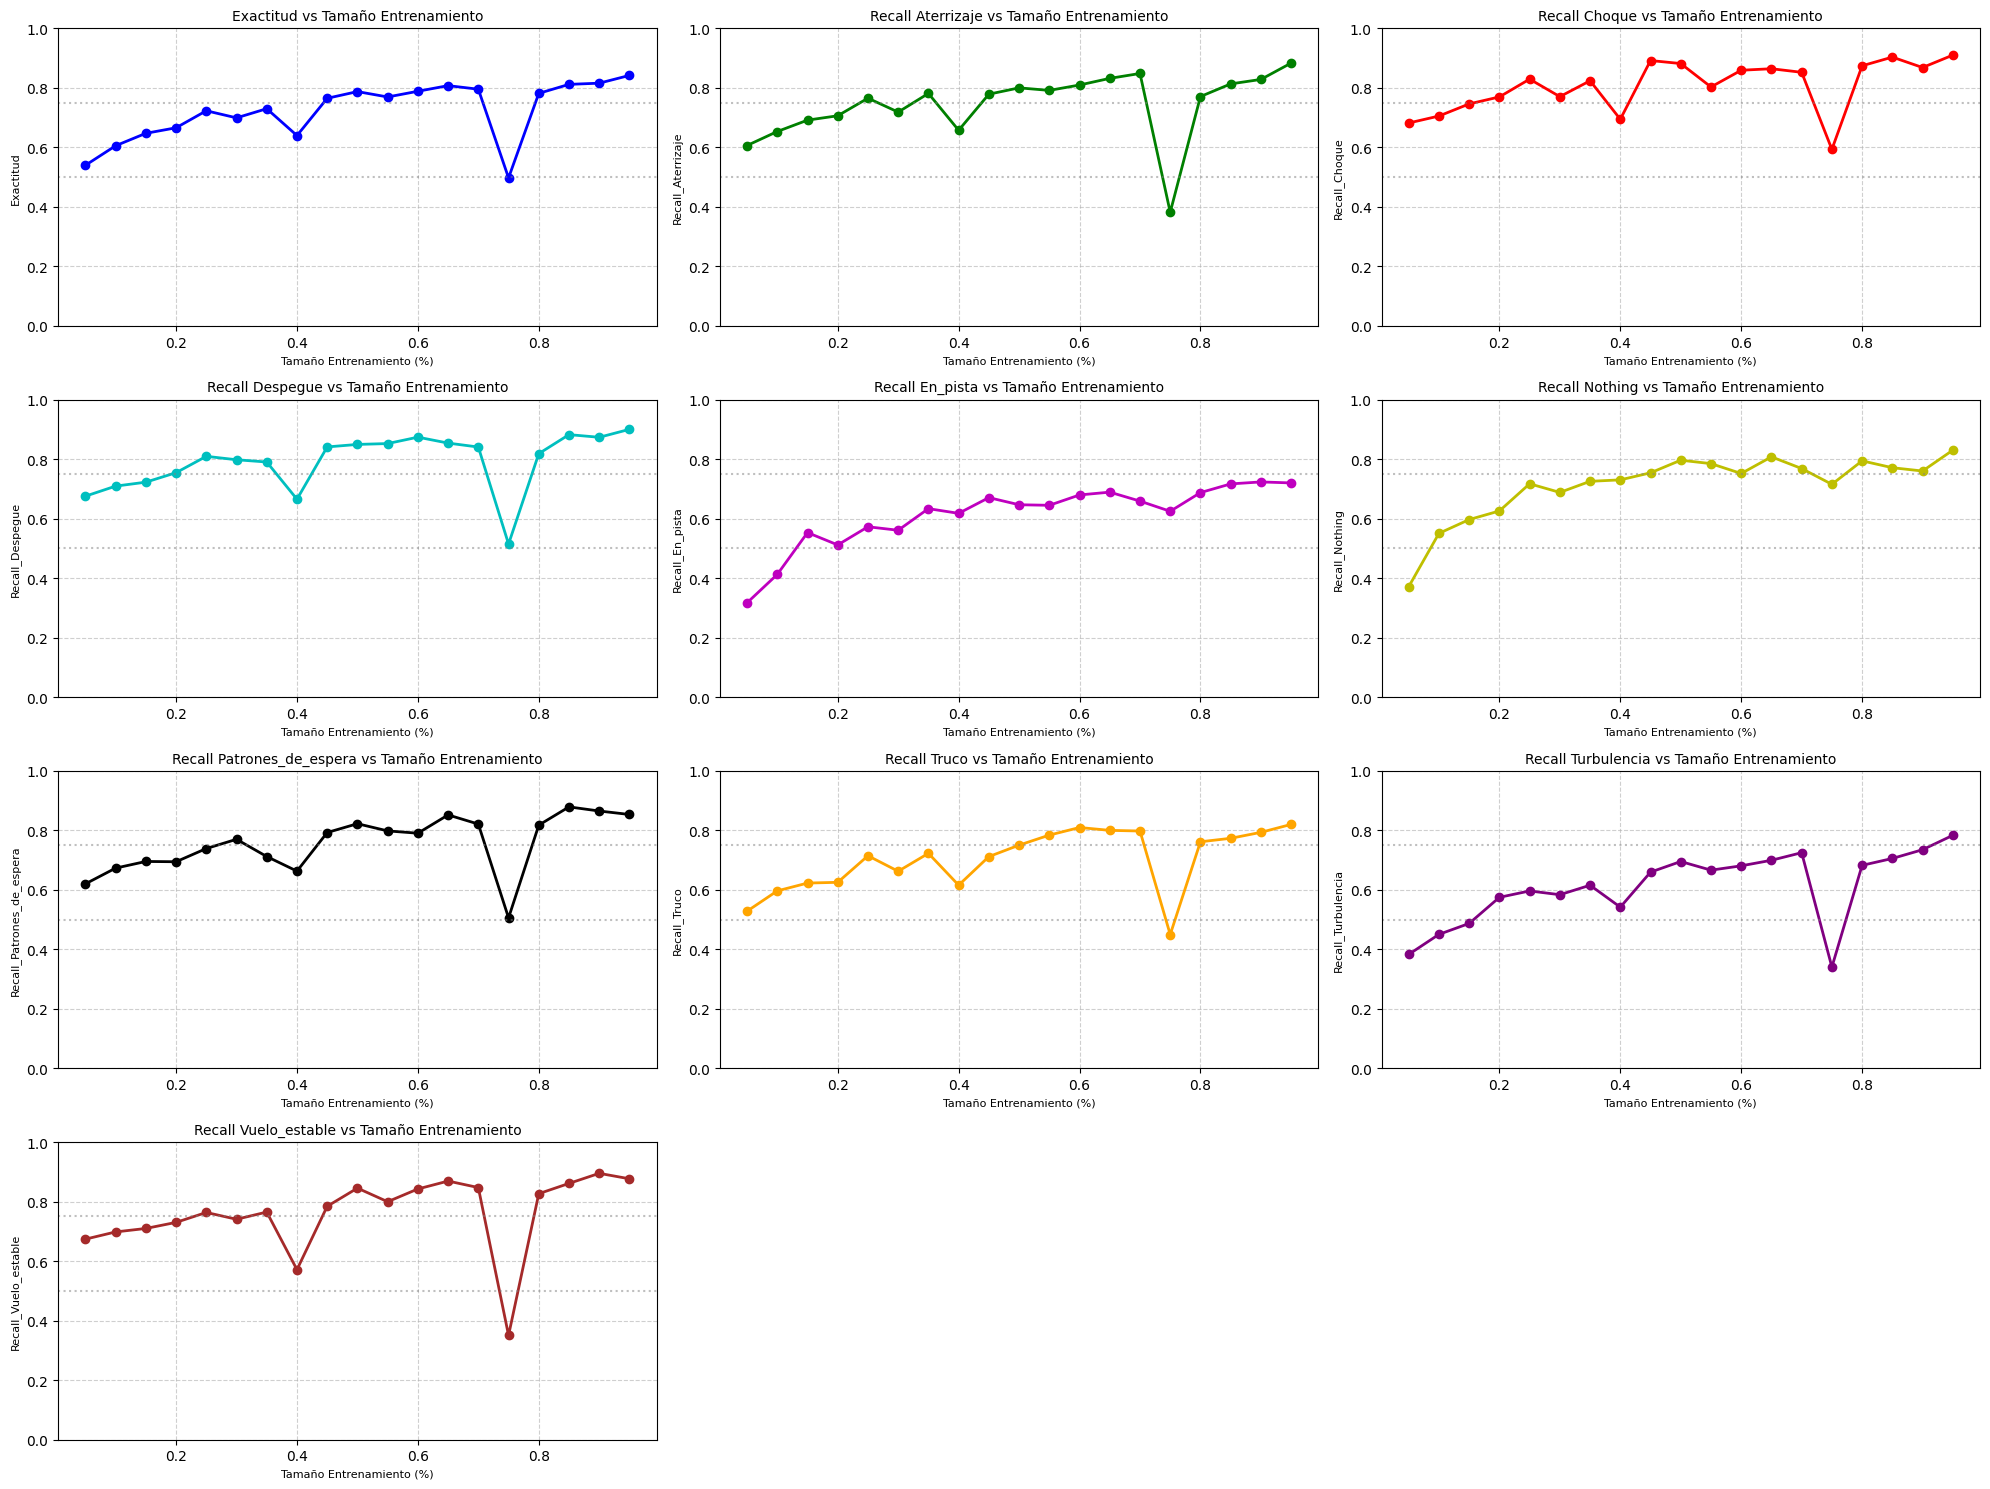

In [44]:
df_promedio = dato.groupby('Tamaño_Entrenamiento').mean().reset_index()

plt.figure(figsize=(20, 15))

# Lista de métricas y colores
metricas = [('Exactitud', 'b')]
colors = ['g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for cls, color in zip(classes, colors):
    metricas.append((f'Recall_{cls}', color))

# Crear subplots en grid 4x3
for idx, (metrica, color) in enumerate(metricas, start=1):
    plt.subplot(4, 3, idx)
    plt.plot(df_promedio['Tamaño_Entrenamiento'], df_promedio[metrica], 
             marker='o', color=color, linestyle='-', linewidth=2)
    
    # Extraer el nombre de la clase del nombre de la métrica
    if metrica.startswith('Recall_'):
        title = f'Recall {metrica[7:]} vs Tamaño Entrenamiento'
    else:
        title = f'{metrica} vs Tamaño Entrenamiento'
    
    plt.title(title, fontsize=10)
    plt.xlabel('Tamaño Entrenamiento (%)', fontsize=8)
    plt.ylabel(metrica, fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(0, 1)
    plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
    plt.axhline(y=0.75, color='gray', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()